# BASICS 02 - Training the network

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%cd '../HOTS'

/home/INT/grimaldi.a/Documents/projets/HOTS/newhots/HOTS


# Loading events

In [2]:
import tonic.datasets as datasets
import tonic.transforms as transforms
from torch.utils.data import SubsetRandomSampler, DataLoader
from torch import Generator
import numpy as np

def get_loader(train = True, kfold = None, kfold_ind = 0, num_workers = 0):
    # creates a loader for the samples of the dataset. If kfold is not None, 
    # then the dataset is splitted into different folds with equal repartition of the classes.
    # works for NMNIST
    dataset = datasets.POKERDVS(save_to='../../Data',
                                    train=train, 
                                    transform = transforms.NumpyAsType(int))
    if kfold:
        subset_indices = []
        subset_size = len(dataset)//kfold
        for i in range(len(dataset.classes)):
            all_ind = np.where(np.array(dataset.targets)==i)[0]
            subset_indices += all_ind[kfold_ind*subset_size//len(dataset.classes):
                            min((kfold_ind+1)*subset_size//len(dataset.classes), len(dataset)-1)].tolist()
        g_cpu = Generator()
        g_cpu.manual_seed(42)
        subsampler = SubsetRandomSampler(subset_indices, g_cpu)
        loader = DataLoader(dataset, batch_size=1, shuffle=False, sampler=subsampler, num_workers = num_workers)
    else:
        loader = DataLoader(dataset, shuffle=True, num_workers = num_workers)
    return loader, dataset.ordering, dataset.classes

In [3]:
loader, indices, classes = get_loader(kfold=None)
print(f'Size of Dataloader: {len(loader)} samples')

Size of Dataloader: 48 samples


# Network definition and training

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 48/48 [03:15<00:00,  4.07s/it]


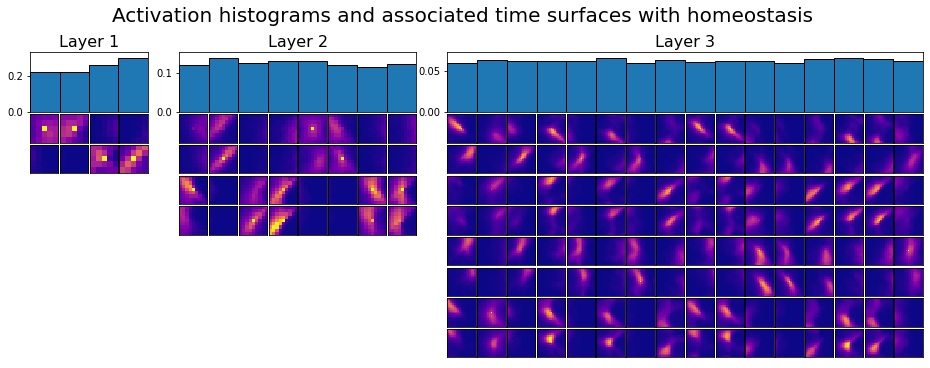

In [4]:
from Network import network
hots = network(name = 'homhots', tau = [0.7, 1.4, 2.8])
hots.running(loader, indices, classes, learn=True)
hots.plotlayer();

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 48/48 [02:43<00:00,  3.40s/it]


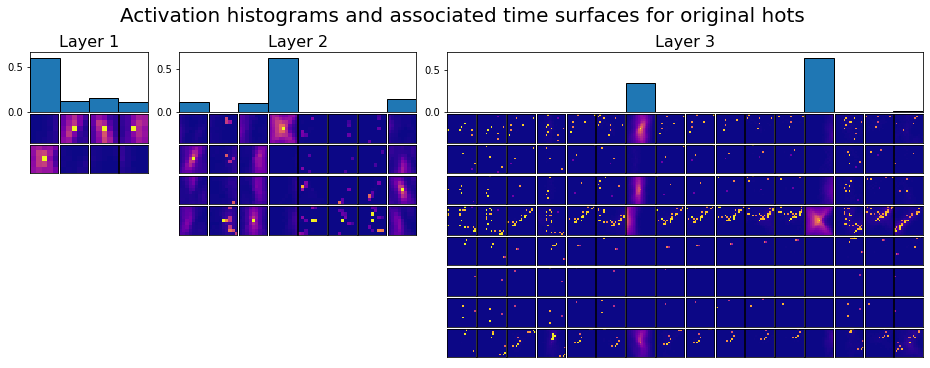

In [5]:
hots = network(name = 'hots', tau = [0.7, 1.4, 2.8])
hots.running(loader, indices, classes, learn=True)
hots.plotlayer();